In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 

In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16

In [9]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T
    

In [8]:
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude*seconds_to_Myr,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude*seconds_to_Myr,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    #lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=3, nbins=nbins)
    #im0 = ax[2*index,2].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    #im1 = ax[2*index+1,2].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    #ax[2*index,2].set_title(f"{etiqueta} Mode 3")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
    for i in range(0,2):
        for j in range(0,2):
            ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        #Grillo
            ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
            
        #Mosquito
            ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()

In [5]:
density = pd.read_csv(path_results + f"fourier_22_None_disc.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc.csv", sep = ",")
vr = pd.read_csv(path_results + f"fourier_22_Vr_disc.csv", sep = ",")
vphi = pd.read_csv(path_results + f"fourier_22_Vphi_disc.csv", sep = ",")


In [5]:
density = pd.read_csv(path_results + f"fourier_22_None_disc_5Gyr.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc_5Gyr.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc_5Gyr.csv", sep = ",")
vr = pd.read_csv(path_results + f"fourier_22_Vr_disc_5Gyr.csv", sep = ",")
vphi = pd.read_csv(path_results + f"fourier_22_Vphi_disc_5Gyr.csv", sep = ",")

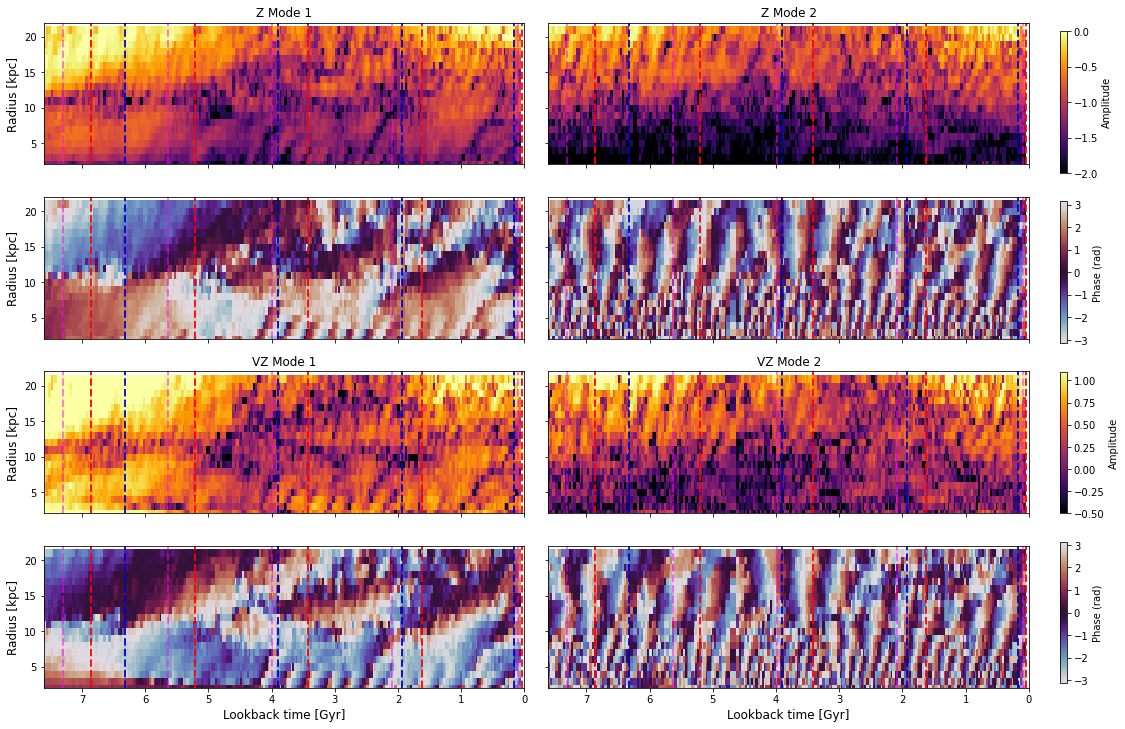

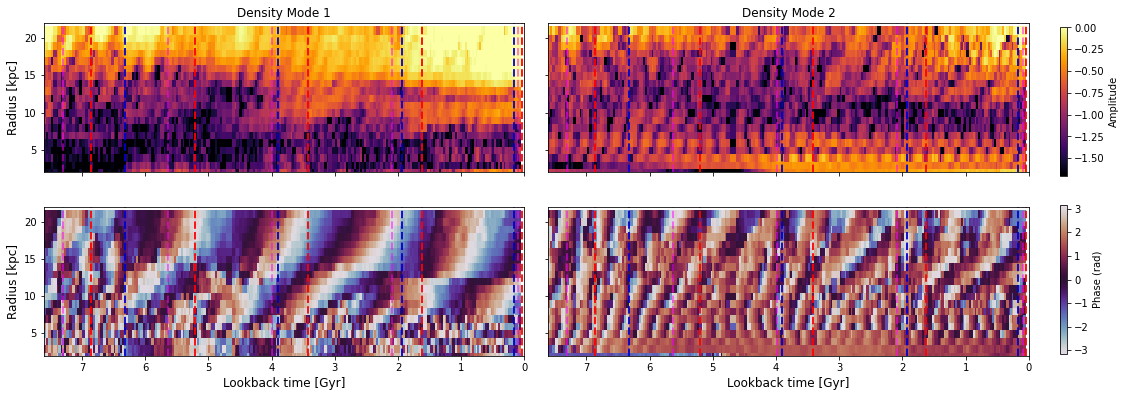

In [6]:

def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    transparencia = 0.9
    tamaño = 2
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
    for i in range(0,2):
        for j in range(0,2):
            ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        #Grillo
            ax[2*index+ i,j].axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
            
        #Mosquito
            ax[2*index+ i,j].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
            ax[2*index+ i,j].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()

fig, ax = plt.subplots(nrows=2*2,ncols =2 , sharex = True,sharey = True,  figsize=(18,12))

plot_modos_fourier (z, index=0,   vmin = -2, vmax = 0, etiqueta="Z",  nbins = 22)
plot_modos_fourier (vz, index = 1, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
ax[3,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[3,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
for i in range(4):
    ax[i,0].set_ylabel("Radius [kpc]",  fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(2,22)

transparencia = 0.9
tamaño = 2
#Arania



plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"ejemplo_poster_zVz.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


fig, ax = plt.subplots(nrows=2,ncols =2 , sharex = True,sharey = True,  figsize=(18,6))

plot_modos_fourier (density, index=0,vmin = -1.7, vmax = 0,etiqueta =  "Density",  nbins = 22)
#plot_modos_fourier (vz, index = 1, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
#for i in range(4):
ax[0,0].set_ylabel("Radius [kpc]", fontsize = 12)
ax[1,0].set_ylabel("Radius [kpc]", fontsize = 12)
#ax[1,0].set_ylabel("Radius [kpc]")
#ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(2,22)

transparencia = 0.9
tamaño = 2
#Arania



plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
#plt.savefig(path_results +"density_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



Text(0.5, 0, 'Lookback time [Gyr]')

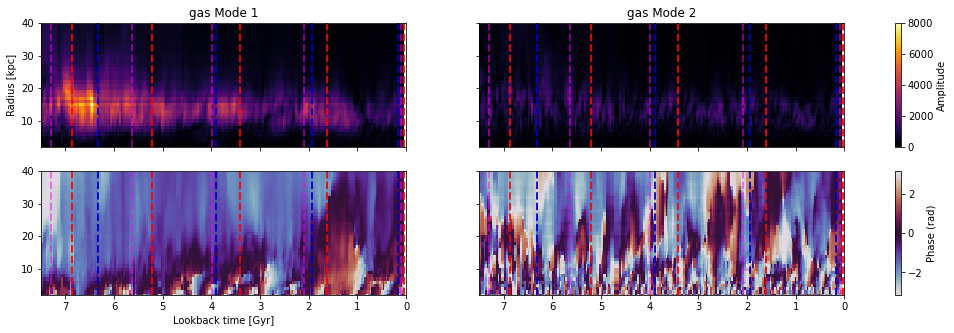

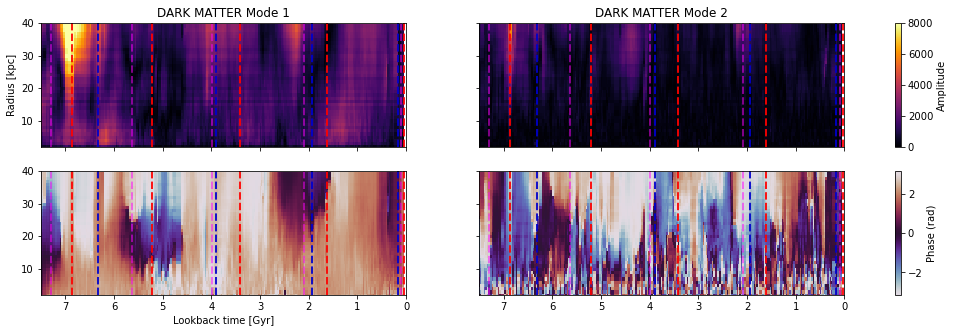

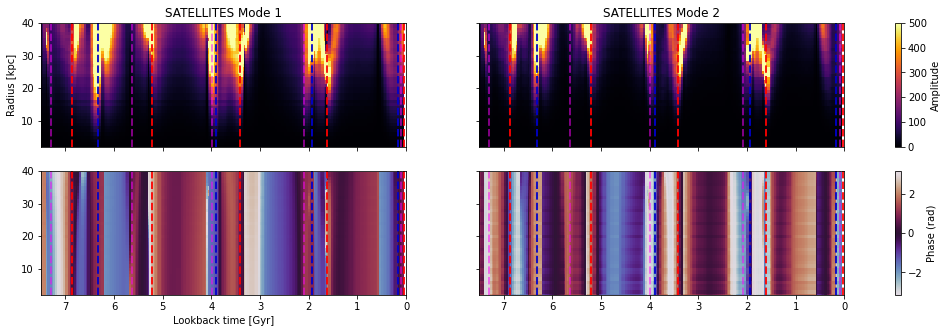

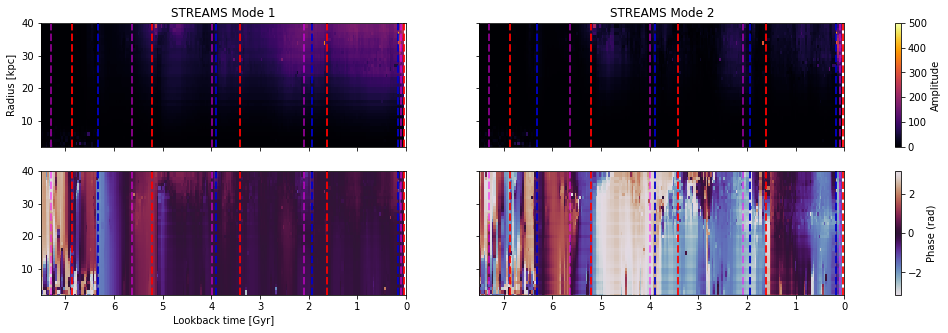

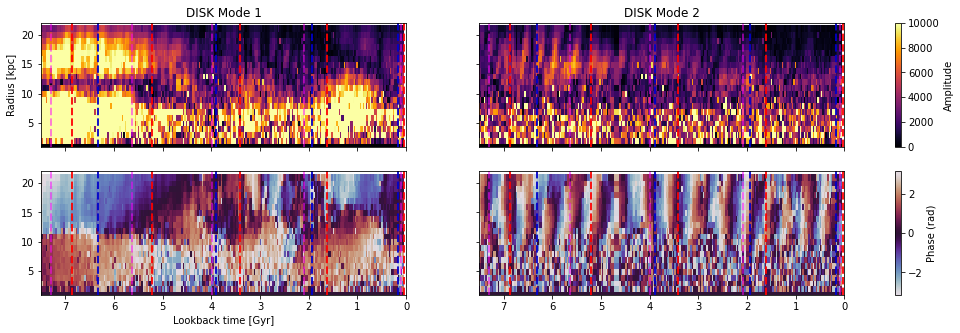

In [10]:
def process_data_to_plot(data, modo, nbins=22):
  #  arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
    arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T
transparencia = 0.9
tamaño = 2

ac_gas = pd.read_csv(path_results + f"fourier_40_az_acceleration_gas.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "gas", nbins = 40)
plot_modos_fourier (ac_gas, index=0, vmin = 0, vmax = 8000,etiqueta =  "gas", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_gas.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



ac_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_dm.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2,sharex = True,sharey = True,  figsize=(18,5))
#plot_modos_fourier (ac_gas, index=0,vmin = -16.5, vmax = -14.0, etiqueta =  "DARK MATTER", nbins = 40)
plot_modos_fourier (ac_dm, index=0,  vmin = 0, vmax = 8000,etiqueta =  "DARK MATTER", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_dm.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_sat = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
plot_modos_fourier (ac_sat, index=0, vmin = 0, vmax = 500, etiqueta =  "SATELLITES", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_satellites.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_streams = pd.read_csv(path_results + f"fourier_40_az_stream_sat_streams.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
plot_modos_fourier (ac_streams, index=0,vmin = 0, vmax = 500, etiqueta =  "STREAMS", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_streams.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_disk = pd.read_csv(path_results + f"fourier_22_az_acceleration_stars_disk.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =2 , sharex = True,sharey = True,  figsize=(18,5))
plot_modos_fourier (ac_disk, index=0,vmin = 0, vmax = 10000, etiqueta =  "DISK", nbins = 22)
plt.xlim(7.5,0)
plt.ylim(1,22)
ax[0,0].set_ylabel("Radius [kpc]")
ax[1,0].set_xlabel("Lookback time [Gyr]")
#plt.savefig(path_results +"fourier_modes_disk.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

In [13]:
density = pd.read_csv(path_results + f"fourier_22_None_disc_5Gyr.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc_5Gyr.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc_5Gyr.csv", sep = ",")
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [14]:
snapshots_analysis = [520,523,525, 527,530,532,535, 537,539,541,
543, 545,547, 550, 553, 555,557, 
560, 563, 565, 567,570,573, 575, 577, 580,
583, 585,587,590, 592,594,
596,598,600,
602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937,
 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996]

def add_satellites(ax):
    transparencia = 0.4
    tamaño = 2   
    #arania
    ax.axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    #Grillo
    ax.axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
    #mosquito
    ax.axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha =transparencia)
    ax.axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)

In [15]:

vz["amp1_npart"]=vz["amp1"]/vz["Nparticles"]
z["amp1_npart"]=z["amp1"]/z["Nparticles"]
density["amp1_npart"]=density["amp1"]/density["Nparticles"]

vz_filt_15 = vz[(vz["Rcenters"]<15)&(vz["Rcenters"]>10)]
vz_filt_10 = vz[(vz["Rcenters"]<10)&(vz["Rcenters"]>5)]
vz_filt_5 = vz[(vz["Rcenters"]<5)&(vz["Rcenters"]>0)]

z_filt_15 = z[(z["Rcenters"]<15)&(z["Rcenters"]>10)]
z_filt_10 = z[(z["Rcenters"]<10)&(z["Rcenters"]>5)]
z_filt_5 = z[(z["Rcenters"]<5)&(z["Rcenters"]>0)]


density_filt_15 = density[(density["Rcenters"]<15)&(density["Rcenters"]>10)]
density_filt_10 = density[(density["Rcenters"]<10)&(density["Rcenters"]>5)]
density_filt_5 = density[(density["Rcenters"]<5)&(density["Rcenters"]>0)]

vz_estimator_15 = []
vz_estimator_10 = []
vz_estimator_5 = []
density_estimator_15 = []
density_estimator_10 = []
density_estimator_5 = []
z_estimator_15 = []
z_estimator_10 = []
z_estimator_5 = []

lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = vz_filt_15[vz_filt_15["snapshot_t"]==snapshot]
    vz_estimator_15.append(np.mean(vz_i["amp1_npart"]))
    vz_i = vz_filt_10[vz_filt_10["snapshot_t"]==snapshot]
    vz_estimator_10.append(np.mean(vz_i["amp1_npart"]))
    vz_i = vz_filt_5[vz_filt_5["snapshot_t"]==snapshot]
    vz_estimator_5.append(np.mean(vz_i["amp1_npart"]))
    

    z_i = z_filt_15[z_filt_15["snapshot_t"]==snapshot]
    z_estimator_15.append(np.mean(z_i["amp1_npart"]))
    z_i = z_filt_10[z_filt_10["snapshot_t"]==snapshot]
    z_estimator_10.append(np.mean(z_i["amp1_npart"]))
    z_i = z_filt_5[z_filt_5["snapshot_t"]==snapshot]
    z_estimator_5.append(np.mean(z_i["amp1_npart"]))
    
    density_i = density_filt_15[density_filt_15["snapshot_t"]==snapshot]
    density_estimator_15.append(np.mean(density_i["amp1_npart"]))
    density_i = density_filt_10[density_filt_10["snapshot_t"]==snapshot]
    density_estimator_10.append(np.mean(density_i["amp1_npart"]))
    density_i = density_filt_5[density_filt_5["snapshot_t"]==snapshot]
    density_estimator_5.append(np.mean(density_i["amp1_npart"]))
    

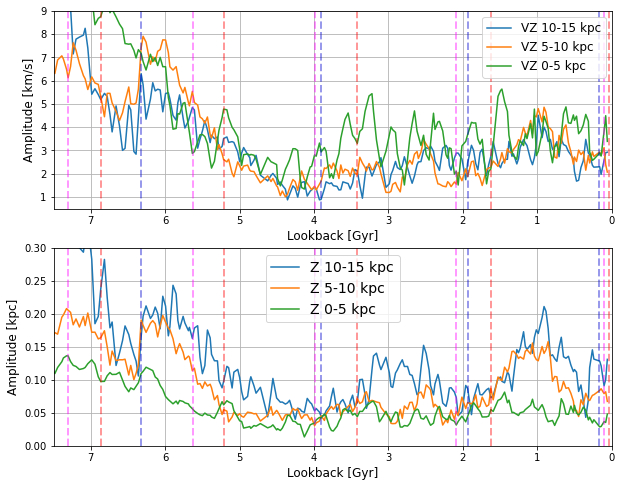

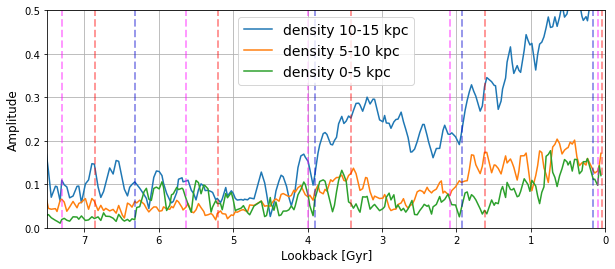

In [16]:

fig, ax = plt.subplots(nrows=2, figsize = (10,8))
ax[0].plot(lookback,vz_estimator_15,label = "VZ 10-15 kpc")
ax[0].plot(lookback,vz_estimator_10,label = "VZ 5-10 kpc")
ax[0].plot(lookback,vz_estimator_5,label = "VZ 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0.5,9)
ax[0].legend(fontsize = 12)
add_satellites(ax[0])


ax[1].plot(lookback,z_estimator_15,label = "Z 10-15 kpc")
ax[1].plot(lookback,z_estimator_10,label = "Z 5-10 kpc")
ax[1].plot(lookback,z_estimator_5,label = "Z 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [kpc]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0.,0.3)
ax[1].legend(fontsize = 14)
add_satellites(ax[1])
plt.savefig("results/Z_VZ_fourier_shells.png", dpi = 100, facecolor = "white")

fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,density_estimator_15,label = "density 10-15 kpc")
ax.plot(lookback,density_estimator_10,label = "density 5-10 kpc")
ax.plot(lookback,density_estimator_5,label = "density 0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(0.,0.5)
ax.legend(fontsize = 14)
add_satellites(ax)
plt.savefig("results/density_fourier_shells.png", dpi = 100, facecolor = "white")
#plt.show()

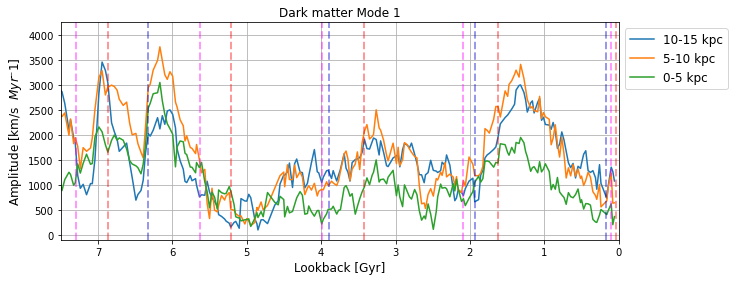

In [18]:
#vz["amp1_npart"]=vz["amp2"]/vz["Nparticles"]
#z["amp1_npart"]=z["amp2"]/z["Nparticles"]
#density["amp1_npart"]=density["amp2"]/density["Nparticles"]
seconds_to_Myr = 3.15576e+16
ac_dm_filt_15 = ac_dm[(ac_dm["Rcenters"]<15)&(ac_dm["Rcenters"]>10)]
ac_dm_filt_10 = ac_dm[(ac_dm["Rcenters"]<10)&(ac_dm["Rcenters"]>5)]
ac_dm_filt_5 = ac_dm[(ac_dm["Rcenters"]<5)&(ac_dm["Rcenters"]>0)]


ac_dm_estimator_15 = []
ac_dm_estimator_10 = []
ac_dm_estimator_5 = []
lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_dm_filt_15[ac_dm_filt_15["snapshot_t"]==snapshot]
    ac_dm_estimator_15.append(np.mean(vz_i["amp1"]))
    vz_i = ac_dm_filt_10[ac_dm_filt_10["snapshot_t"]==snapshot]
    ac_dm_estimator_10.append(np.mean(vz_i["amp1"]))
    vz_i = ac_dm_filt_5[ac_dm_filt_5["snapshot_t"]==snapshot]
    ac_dm_estimator_5.append(np.mean(vz_i["amp1"]))
    
    
fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(lookback,np.array(ac_dm_estimator_15)*seconds_to_Myr,label = "10-15 kpc")
ax.plot(lookback,np.array(ac_dm_estimator_10)*seconds_to_Myr,label = "5-10 kpc")
ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


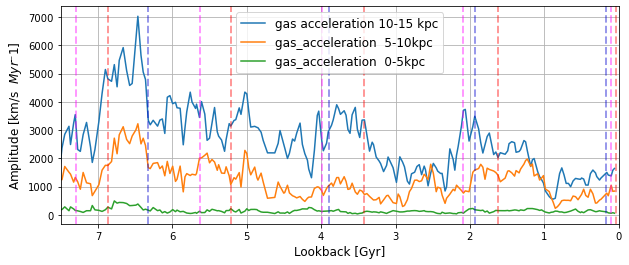

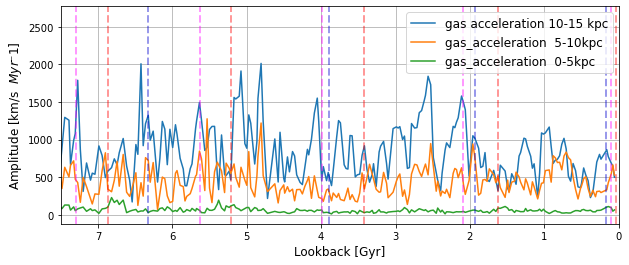

In [19]:

seconds_to_Myr = 3.15576e+16
ac_gas_filt_15 = ac_gas[(ac_gas["Rcenters"]<15)&(ac_gas["Rcenters"]>10)]
ac_gas_filt_10 = ac_gas[(ac_gas["Rcenters"]<10)&(ac_gas["Rcenters"]>5)]
ac_gas_filt_5 = ac_gas[(ac_gas["Rcenters"]<5)&(ac_gas["Rcenters"]>0)]


ac_gas_estimator_15 = []
ac_gas_estimator_10 = []
ac_gas_estimator_5 = []
lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_gas_filt_15[ac_gas_filt_15["snapshot_t"]==snapshot]
    ac_gas_estimator_15.append(np.mean(vz_i["amp1"]))
    vz_i = ac_gas_filt_10[ac_gas_filt_10["snapshot_t"]==snapshot]
    ac_gas_estimator_10.append(np.mean(vz_i["amp1"]))
    vz_i = ac_gas_filt_5[ac_gas_filt_5["snapshot_t"]==snapshot]
    ac_gas_estimator_5.append(np.mean(vz_i["amp1"]))
    
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_gas_estimator_15)*seconds_to_Myr,label = "gas acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_gas_estimator_10)*seconds_to_Myr,label = "gas_acceleration  5-10kpc")
ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr,label = "gas_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()
#vz["amp1_npart"]=vz["amp2"]/vz["Nparticles"]
#z["amp1_npart"]=z["amp2"]/z["Nparticles"]
#density["amp1_npart"]=density["amp2"]/density["Nparticles"]
seconds_to_Myr = 3.15576e+16
ac_gas_filt_15 = ac_gas[(ac_gas["Rcenters"]<15)&(ac_gas["Rcenters"]>10)]
ac_gas_filt_10 = ac_gas[(ac_gas["Rcenters"]<10)&(ac_gas["Rcenters"]>5)]
ac_gas_filt_5 = ac_gas[(ac_gas["Rcenters"]<5)&(ac_gas["Rcenters"]>0)]


ac_gas_estimator_15 = []
ac_gas_estimator_10 = []
ac_gas_estimator_5 = []
lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_gas_filt_15[ac_gas_filt_15["snapshot_t"]==snapshot]
    ac_gas_estimator_15.append(np.mean(vz_i["amp2"]))
    vz_i = ac_gas_filt_10[ac_gas_filt_10["snapshot_t"]==snapshot]
    ac_gas_estimator_10.append(np.mean(vz_i["amp2"]))
    vz_i = ac_gas_filt_5[ac_gas_filt_5["snapshot_t"]==snapshot]
    ac_gas_estimator_5.append(np.mean(vz_i["amp2"]))
    
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_gas_estimator_15)*seconds_to_Myr,label = "gas acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_gas_estimator_10)*seconds_to_Myr,label = "gas_acceleration  5-10kpc")
ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr,label = "gas_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()


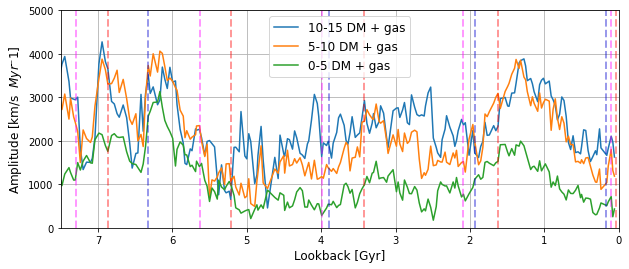

In [33]:
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_gas_estimator_15)*seconds_to_Myr +np.array(ac_dm_estimator_15)*seconds_to_Myr +np.array(ac_sat_estimator_15)*seconds_to_Myr  ,label = "10-15 DM + gas")
ax.plot(lookback,np.array(ac_gas_estimator_10)*seconds_to_Myr +np.array(ac_dm_estimator_10)*seconds_to_Myr + np.array(ac_sat_estimator_10)*seconds_to_Myr ,label = "5-10 DM + gas")
ax.plot(lookback,np.array(ac_gas_estimator_5)*seconds_to_Myr +np.array(ac_dm_estimator_5)*seconds_to_Myr ,label = "0-5 DM + gas")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(0,5000)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()


1.2851648456373156e-13


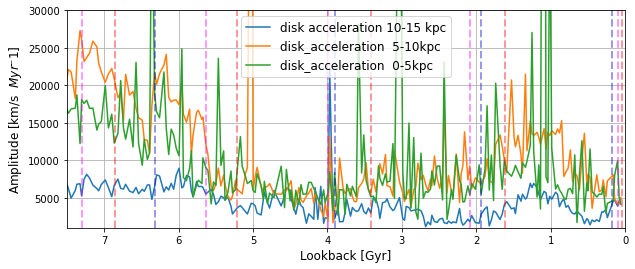

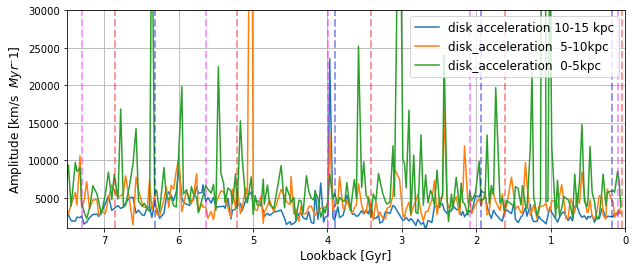

In [21]:

seconds_to_Myr = 3.15576e+16
ac_disk_filt_15 = ac_disk[(ac_disk["Rcenters"]<15)&(ac_disk["Rcenters"]>10)]
ac_disk_filt_10 = ac_disk[(ac_disk["Rcenters"]<10)&(ac_disk["Rcenters"]>5)]
ac_disk_filt_5 = ac_disk[(ac_disk["Rcenters"]<5)&(ac_disk["Rcenters"]>0)]


ac_disk_estimator_15 = []
ac_disk_estimator_10 = []
ac_disk_estimator_5 = []
lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_disk_filt_15[ac_disk_filt_15["snapshot_t"]==snapshot]
    ac_disk_estimator_15.append(np.mean(vz_i["amp1"]))
    vz_i = ac_disk_filt_10[ac_disk_filt_10["snapshot_t"]==snapshot]
    ac_disk_estimator_10.append(np.mean(vz_i["amp1"]))
    vz_i = ac_disk_filt_5[ac_disk_filt_5["snapshot_t"]==snapshot]
    ac_disk_estimator_5.append(np.mean(vz_i["amp1"]))
    
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_disk_estimator_15)*seconds_to_Myr,label = "disk acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_disk_estimator_10)*seconds_to_Myr,label = "disk_acceleration  5-10kpc")
ax.plot(lookback,np.array(ac_disk_estimator_5)*seconds_to_Myr,label = "disk_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(1000,30000)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()
#vz["amp1_npart"]=vz["amp2"]/vz["Nparticles"]
#z["amp1_npart"]=z["amp2"]/z["Nparticles"]
#density["amp1_npart"]=density["amp2"]/density["Nparticles"]
seconds_to_Myr = 3.15576e+16
ac_disk_filt_15 = ac_disk[(ac_disk["Rcenters"]<15)&(ac_disk["Rcenters"]>10)]
ac_disk_filt_10 = ac_disk[(ac_disk["Rcenters"]<10)&(ac_disk["Rcenters"]>5)]
ac_disk_filt_5 = ac_disk[(ac_disk["Rcenters"]<5)&(ac_disk["Rcenters"]>0)]


ac_disk_estimator_15 = []
ac_disk_estimator_10 = []
ac_disk_estimator_5 = []
lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_disk_filt_15[ac_disk_filt_15["snapshot_t"]==snapshot]
    ac_disk_estimator_15.append(np.mean(vz_i["amp2"]))
    vz_i = ac_disk_filt_10[ac_disk_filt_10["snapshot_t"]==snapshot]
    ac_disk_estimator_10.append(np.mean(vz_i["amp2"]))
    vz_i = ac_disk_filt_5[ac_disk_filt_5["snapshot_t"]==snapshot]
    ac_disk_estimator_5.append(np.mean(vz_i["amp2"]))
    
    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_disk_estimator_15)*seconds_to_Myr,label = "disk acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_disk_estimator_10)*seconds_to_Myr,label = "disk_acceleration  5-10kpc")
ax.plot(lookback,np.array(ac_disk_estimator_5)*seconds_to_Myr,label = "disk_acceleration  0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.set_ylim(1000,30000)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
plt.show()


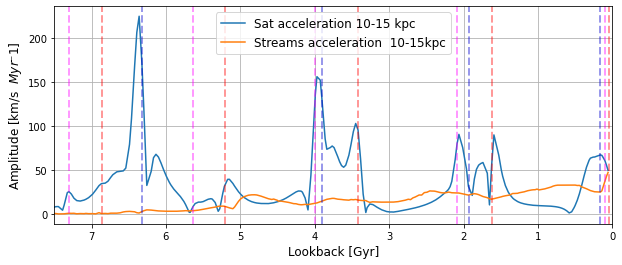

In [29]:

seconds_to_Myr = 3.15576e+16
ac_sat_15 = ac_sat[(ac_sat["Rcenters"]<15)&(ac_sat["Rcenters"]>10)]
ac_streams_15 = ac_streams[(ac_streams["Rcenters"]<15)&(ac_streams["Rcenters"]>10)]
ac_sat_10 = ac_sat[(ac_sat["Rcenters"]<10)&(ac_sat["Rcenters"]>5)]
ac_streams_10 = ac_streams[(ac_streams["Rcenters"]<10)&(ac_streams["Rcenters"]>5)]

ac_sat_estimator_15 = []
ac_streams_estimator_15 = []

ac_sat_estimator_10 = []
ac_streams_estimator_10 = []

lookback = np.zeros(len(snapshots_analysis))
for i,snapshot in enumerate(snapshots_analysis):
    lookback[i] = datos_edades.loc[datos_edades['Snapshot'] == snapshot, 'Lookback'].iloc[0]
    vz_i = ac_sat_15[ac_sat_15["snapshot_t"]==snapshot]
    ac_sat_estimator_15.append(np.mean(vz_i["amp1"]))
    vz_i = ac_streams_15[ac_streams_15["snapshot_t"]==snapshot]
    ac_streams_estimator_15.append(np.mean(vz_i["amp1"]))
    
    vz_i = ac_sat_10[ac_sat_10["snapshot_t"]==snapshot]
    ac_sat_estimator_10.append(np.mean(vz_i["amp1"]))
    vz_i = ac_streams_10[ac_streams_10["snapshot_t"]==snapshot]
    ac_streams_estimator_10.append(np.mean(vz_i["amp1"]))


    
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(lookback,np.array(ac_sat_estimator_15)*seconds_to_Myr,label = "Sat acceleration 10-15 kpc")
ax.plot(lookback,np.array(ac_streams_estimator_15)*seconds_to_Myr,label = "Streams acceleration  10-15kpc")

#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
#ax.set_ylim(0,40000)
ax.legend(fontsize = 12)
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/satelites_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


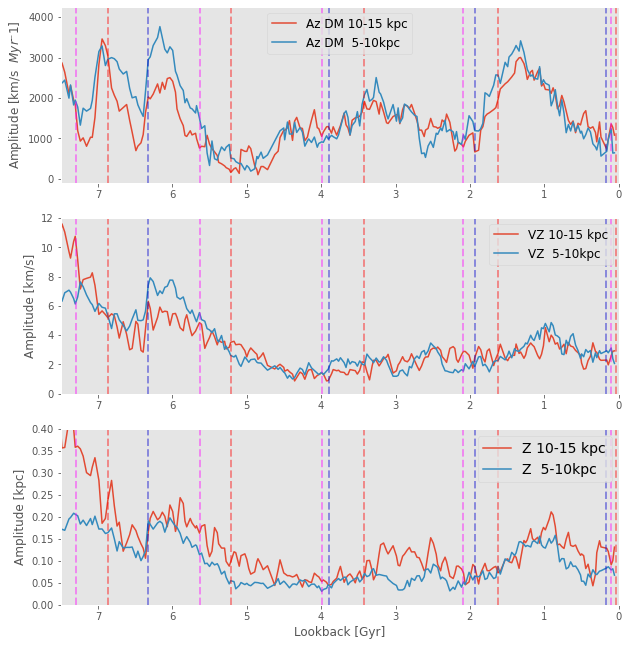

In [71]:

fig, ax = plt.subplots(nrows=3, figsize = (10,11))
ax[0].plot(lookback,np.array(ac_dm_estimator_15)*seconds_to_Myr,label = "Az DM 10-15 kpc")
ax[0].plot(lookback,np.array(ac_dm_estimator_10)*seconds_to_Myr,label = "Az DM  5-10kpc")
#ax[0].plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "Az DM 0-5kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[0].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[0].set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax[0].grid()
ax[0].set_xlim(7.5,0)
ax[0].legend(fontsize = 12)
add_satellites(ax[0])

ax[1].plot(lookback,vz_estimator_15,label = "VZ 10-15 kpc")
ax[1].plot(lookback,vz_estimator_10,label = "VZ  5-10kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
#ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Amplitude [km/s]', fontsize = 12)
ax[1].grid()
ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0,12)
ax[1].legend(fontsize = 12)
add_satellites(ax[1])
#fig.savefig("test.png")


ax[2].plot(lookback,z_estimator_15,label = "Z 10-15 kpc")
ax[2].plot(lookback,z_estimator_10,label = "Z  5-10kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax[2].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[2].set_ylabel('Amplitude [kpc]', fontsize = 12)
ax[2].grid()
ax[2].set_xlim(7.5,0)
ax[2].set_ylim(0,0.4)
ax[2].legend(fontsize = 14)
add_satellites(ax[2])
#fig.savefig("test.png")
plt.show()


In [17]:
from scipy import stats
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")
def print_stats(mine):
    print ("MIC", mine.mic())
    print ("MAS", mine.mas())
    print ("MEV", mine.mev())
    print ("MCN (eps=0)", mine.mcn(0))
    print ("MCN (eps=1-MIC)", mine.mcn_general())
    print ("GMIC", mine.gmic())
    print ("TIC", mine.tic())



In [18]:
d15 = {'Lookback': lookback, 'DM':np.array(ac_dm_estimator_15)*seconds_to_Myr , 
       'Sat':np.array(ac_sat_estimator_15)*seconds_to_Myr, 'Z':np.array(z_estimator_15) ,'VZ':np.array(vz_estimator_15),
       "density":np.array(density_estimator_15)}
d10 = {'Lookback': lookback, 'DM':np.array(ac_dm_estimator_10)*seconds_to_Myr , 
       'Sat':np.array(ac_sat_estimator_10)*seconds_to_Myr, 'Z':np.array(z_estimator_10) ,'VZ':np.array(vz_estimator_10),
      "density":np.array(density_estimator_10)}
df15 = pd.DataFrame(data=d15)
df10 = pd.DataFrame(data=d10)

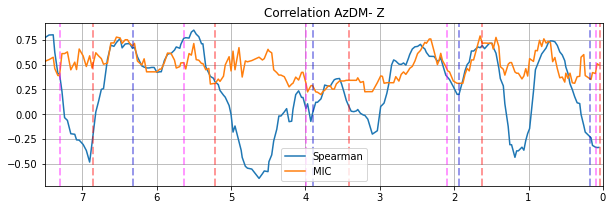

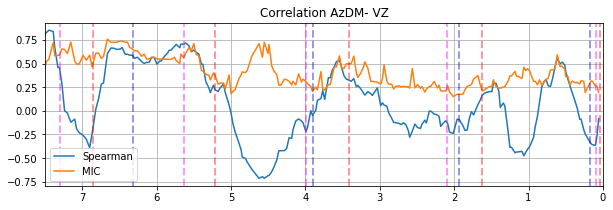

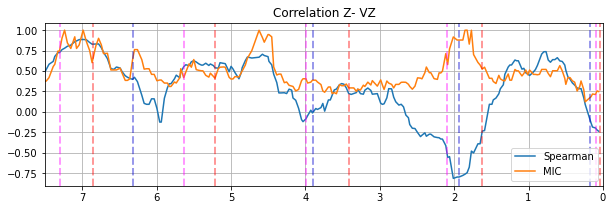

In [25]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []

cor_z_vz = []
mic_z_vz = []
for lb in d15["Lookback"]:
    df_w1 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])


    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)
    cor_z_vz.append(cor.correlation)
    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["VZ"])
    mic = mine.mic()
    
    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    mic_z_vz.append(mic)
    
fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- Z")
ax.plot(lookback,cor_z_tot,label = "Spearman")
ax.plot(lookback,mic_z_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- VZ")
ax.plot(lookback,cor_vz_tot,label = "Spearman")
ax.plot(lookback,mic_vz_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation Z- VZ")
ax.plot(lookback,cor_z_vz,label = "Spearman")
ax.plot(lookback,mic_z_vz,label = "MIC")
ax.set_xlim(7.5,0)
add_satellites(ax)
ax.grid()
ax.legend()
plt.show()   

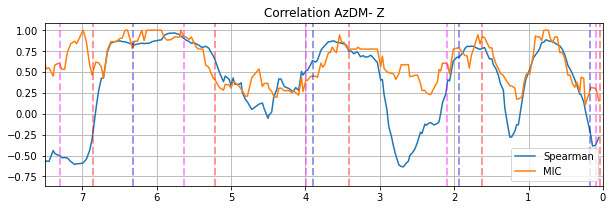

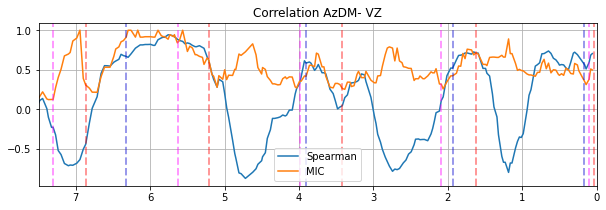

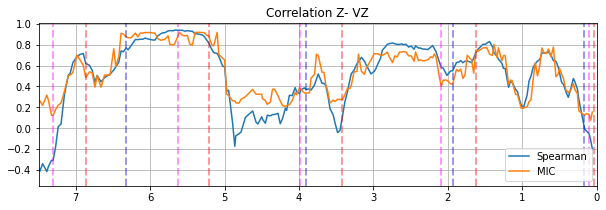

In [26]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []

cor_z_vz = []
mic_z_vz = []
for lb in d15["Lookback"]:
    df_w1 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])


    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)
    cor_z_vz.append(cor.correlation)
    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["VZ"])
    mic = mine.mic()
    
    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    mic_z_vz.append(mic)
    
fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- Z")
ax.plot(lookback,cor_z_tot,label = "Spearman")
ax.plot(lookback,mic_z_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation AzDM- VZ")
ax.plot(lookback,cor_vz_tot,label = "Spearman")
ax.plot(lookback,mic_vz_tot,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()

fig, ax = plt.subplots(figsize = (10,3))
ax.set_title("Correlation Z- VZ")
ax.plot(lookback,cor_z_vz,label = "Spearman")
ax.plot(lookback,mic_z_vz,label = "MIC")
ax.set_xlim(7.5,0)
ax.grid()
ax.legend()
add_satellites(ax)
plt.show()   

In [95]:
df_w1 = df15[(df15["Lookback"]<7)&(df15["Lookback"]>6.0)]
spearman=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
print(spearman)
mine.compute_score(df_w1["VZ"],df_w1["DM"])
print_stats(mine)

SpearmanrResult(correlation=0.6136752136752136, pvalue=0.0008554003437982895)
MIC 0.7105991233834824
MAS 0.12624743234453595
MEV 0.7105991233834824
MCN (eps=0) 2.584962500721156
MCN (eps=1-MIC) 2.0
GMIC 0.6976678338339877
TIC 1.9681184067957527


In [97]:
spearman.correlation

0.6136752136752136

In [66]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [67]:
#df15.drop('Lookback', inplace=True, axis=1)
#df15.drop('density', inplace=True, axis=1)


df10.drop('Lookback', inplace=True, axis=1)
df10.drop('density', inplace=True, axis=1)
df10.drop('Sat', inplace=True, axis=1)

[[ 0.52261771  0.61926718  0.5859854 ]
 [-0.82726954  0.20215349  0.52417465]
 [-0.20614516  0.75871083 -0.61794987]]
------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.81969699 0.97827509 1.        ]


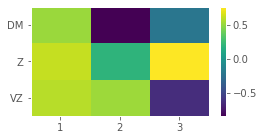

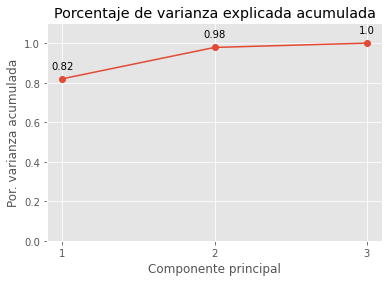

In [70]:
datos = df10
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3']
)

print(modelo_pca.components_)
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44846498 0.7035825  0.89430963 0.98431903 1.        ]


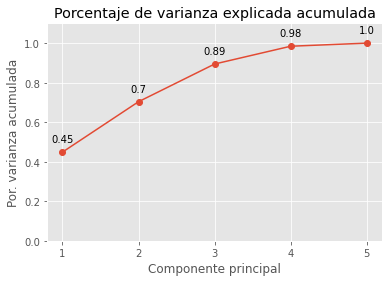

In [143]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df10.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df10.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

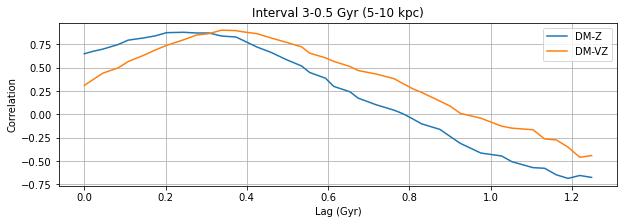

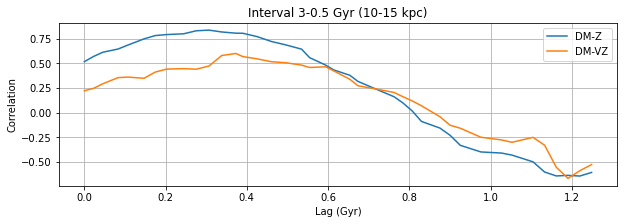

In [15]:
#TEMPORAL CROSS CORRELATION
#Cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))
df_w = df10[(df10["Lookback"]<3)&(df10["Lookback"]>0.5)]
lag = []
cor_z = []
cor_vz= []
z_vz = []
for i in range(40):
    lb = df_w["Lookback"].iloc[0] - df_w["Lookback"].iloc[i]
    lag.append(lb)
    #print(f"Lag of {lb:.2f} Gyr aprox")
    res_vz = crosscorr(df_w["VZ"], df_w["DM"], lag=i)
    cor_vz.append(res_vz)
    res_z = crosscorr(df_w["Z"], df_w["DM"], lag=i)
    cor_z.append(res_z)
    z_vz.append(crosscorr(df_w["Z"], df_w["VZ"], lag=i))
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,cor_z,label = "DM-Z")
ax.plot(lag,cor_vz,label = "DM-VZ")
ax.set_ylabel("Correlation")
ax.set_xlabel("Lag (Gyr)")
ax.set_title("Interval 3-0.5 Gyr (5-10 kpc)")
ax.grid()
ax.legend()

plt.show() 


df_w = df15[(df15["Lookback"]<3)&(df15["Lookback"]>0.5)]
lag = []
cor_z = []
cor_vz= []
z_vz = []
for i in range(40):
    lb = df_w["Lookback"].iloc[0] - df_w["Lookback"].iloc[i]
    lag.append(lb)
    #print(f"Lag of {lb:.2f} Gyr aprox")
    res_vz = crosscorr(df_w["VZ"], df_w["DM"], lag=i)
    cor_vz.append(res_vz)
    res_z = crosscorr(df_w["Z"], df_w["DM"], lag=i)
    cor_z.append(res_z)
    z_vz.append(crosscorr(df_w["Z"], df_w["VZ"], lag=i))
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,cor_z,label = "DM-Z")
ax.plot(lag,cor_vz,label = "DM-VZ")
ax.set_title("Interval 3-0.5 Gyr (10-15 kpc)")
ax.set_ylabel("Correlation")
ax.set_xlabel("Lag (Gyr)")
ax.grid()
ax.legend()

plt.show()   

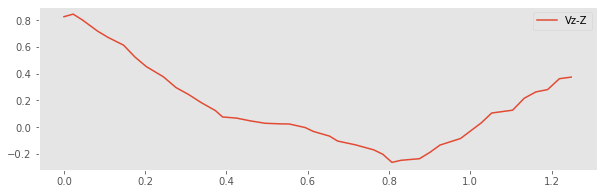

In [82]:
fig, ax = plt.subplots(figsize = (10,3))

ax.plot(lag,z_vz,label = "Vz-Z")


ax.grid()
ax.legend()

plt.show()   

In [62]:
window = 0.8 #Gyr
cor_z_tot = []
cor_vz_tot = []
mic_z_tot = []
mic_vz_tot = []
lookback_tot = []
for lb in df10["Lookback"]:
    df_w1 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    cor_vz=stats.spearmanr(df_w1["VZ"],df_w1["DM"])
    cor_z=stats.spearmanr(df_w1["Z"],df_w1["DM"])
    cor = stats.spearmanr(df_w1["Z"],df_w1["VZ"])

    cor_z_tot.append(cor_z.correlation)
    cor_vz_tot.append(cor_vz.correlation)

    
    mine.compute_score(df_w1["VZ"],df_w1["DM"])
    mic_vz = mine.mic()
    mine.compute_score(df_w1["Z"],df_w1["DM"])
    mic_z = mine.mic()

    mic_z_tot.append(mic_z)
    mic_vz_tot.append(mic_vz)
    lookback_tot.append(lb)
    fig, ax = plt.subplot_mosaic(
        [["top left", "top left", "top left", "top right"],
         ["center left", "center left","center left", "center right"],
         ["bottom row", "bottom row", "bottom row", "bottom right"],
         ["bb row", "bb row", "bb row", "bb right"]
        ], figsize=(14, 14))
    ax["top left"].set_title("Correlation az (DM)-Z (disk)")
    ax["bottom row"].set_title("Correlation az (DM)-Vz (disk)")
    
    ax["top left"].plot(df10["Lookback"],df10["Z"],label = "Z")
    ax[0] =ax["top left"].twinx()
    ax[0].plot(df10["Lookback"],df10["DM"],label = "DM", color = "orange")

    ax["bottom row"].plot(df10["Lookback"],df10["VZ"],label = "VZ", color = "red")
    ax[1] =ax["bottom row"].twinx()
    ax[1].plot(df10["Lookback"],df10["DM"],label = "DM", color = "orange")
    
    ax["top left"].set_xlim(7.6,0)
    ax["bottom row"].set_xlim(7.6,0)
    ax["center left"].set_xlim(7.6,0)
    ax["bb row"].set_xlim(7.6,0)
    #ax["top right"].axis('off')
    #ax["center right"].axis('off')
    ax["center right"].axis('off')
    ax["bb right"].axis('off')
    add_satellites(ax["top left"])
    add_satellites(ax["bottom row"])
    add_satellites(ax["center left"])
    add_satellites(ax["bb row"])

    
    ax["top left"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["bottom row"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["top left"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')
    ax["bottom row"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')

    
    
    ax["center left"].plot(lookback_tot,cor_z_tot,label = "Spearman")
    ax["center left"].plot(lookback_tot,mic_z_tot,label = "MIC")
    ax["center left"].legend(loc = "lower right")
    
    ax["bb row"].plot(lookback_tot,cor_vz_tot,label = "Spearman")
    ax["bb row"].plot(lookback_tot,mic_vz_tot,label = "MIC")
    ax["bb row"].legend(loc = "lower right")
    
    ax["center left"].set_ylim(-0.75,1)
    ax["bb row"].set_ylim(-0.75,1)
    
    ax["top right"].scatter(df_w1["DM"],df_w1["Z"], c= df_w1["Lookback"], cmap = "jet")
   # ax["top right"].set_xlim(0, 3700)
   # ax["top right"].set_ylim(0, 3700)
    ax["top right"].axes.get_xaxis().set_ticks([])
    ax["top right"].axes.get_yaxis().set_ticks([])
    ax["bottom right"].scatter(df_w1["DM"],df_w1["VZ"], c= df_w1["Lookback"], cmap = "jet")
    ax["bottom right"].axes.get_xaxis().set_ticks([])
    ax["bottom right"].axes.get_yaxis().set_ticks([])
    ax["top left"].grid()
    ax["center left"].grid()
    ax["bottom row"].grid()
    ax["bb row"].grid()
    plt.savefig(f"correlations_10kpc/{lb:.2f}_cor.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
    plt.close()

In [22]:
df10_red = df10.drop('Lookback', inplace=False, axis=1)
df15_red = df15.drop('Lookback', inplace=False, axis=1)
print(df10_red)

              DM        Sat         Z        VZ   density
0    2681.004789   1.131276  0.164083  8.082761  0.072966
1    2179.941646   1.532704  0.160489  7.432048  0.079288
2    2674.897957   1.872463  0.167712  6.745719  0.083541
3    2487.339080   2.306569  0.159251  6.514900  0.084330
4    2368.076188   2.894475  0.171830  6.307983  0.044601
..           ...        ...       ...       ...       ...
219   682.333722  26.256175  0.084017  2.931112  0.131489
220   969.434776  25.578579  0.086579  2.794783  0.125842
221  1236.866479  22.438798  0.079194  3.122224  0.130906
222   636.788287  20.061030  0.081921  2.394046  0.143778
223   643.629299  17.556670  0.067396  2.069167  0.171287

[224 rows x 5 columns]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

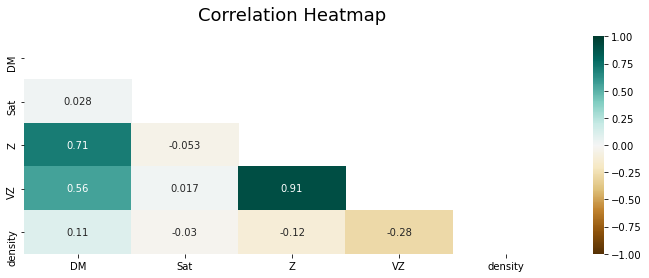

In [24]:
plt.figure(figsize=(12, 4))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df10_red.corr(), dtype=np.bool))
heatmap = sns.heatmap(df10_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

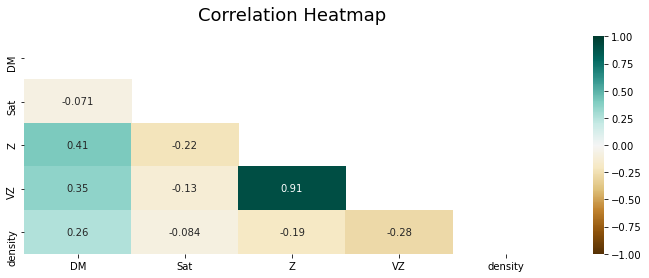

In [25]:
plt.figure(figsize=(12, 4))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df15_red.corr(), dtype=np.bool))
heatmap = sns.heatmap(df15_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [20]:
def MIC_matrix(df):
    mic_results_matrix = np.zeros((len(df.columns),len(df.columns)))
    for i,var1 in enumerate(df.columns):
        for j,var2 in enumerate(df.columns):
            mine.compute_score(df[var1],df[var2])
            #mic = mine.mic()
            mic_results_matrix[i,j] = mine.mic()
    mic_results_df = pd.DataFrame(data= mic_results_matrix, index=df.columns,columns=df.columns)
    return mic_results_df

In [24]:
for lb in df10["Lookback"]:
   # lb = 3.77
    window =0.8
    df_w1 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w1.drop('Lookback', inplace=True, axis=1)
    mic_matrix = MIC_matrix(df_w1)

    fig, ax = plt.subplot_mosaic(
    [["top"],
     ["top"],
     ["center"],
     ["center"],
     ["bottom"]], figsize=(12, 10))
    mask = np.triu(np.ones_like(df_w1.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df_w1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["top"], cbar_kws={'label': 'Corr'})
    #heatmap = sns.heatmap(df15_red.corr(),  vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["top"])
    #heatmap.set_title('Correlation', fontdict={'fontsize':12}, pad=16)

    heatmap = sns.heatmap(mic_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax["center"],  cbar_kws={'label': 'MIC'})
    #heatmap.set_title('MIC', fontdict={'fontsize':12}, pad=16)


    ax["bottom"].axvline(x =lb, ls='-', c = "black", linewidth = 2, alpha = 0.8)
    ax["bottom"].axvspan(lb - window/2, lb + window/2, alpha=0.3, color='black')
    add_satellites(ax["bottom"])
    ax["bottom"].grid()
    ax["bottom"].set_xlim(7.6,0)
    plt.savefig(f"cor_mic/correlations_15kpc/{lb:.2f}_cor.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
    plt.close()
